## APAI/STAT 4011 Natural Language Processing

## Assignment 1

### Submission format: 2 files (please don't zip them together), one is the ipynb file implemented with code and comments here, and one is pdf/ html file generated from this notebook. It's highly suggested that you directly write in this notebook.

*The late submission policy*: If you have difficulty handing in on time (e.g., illness etc.), you would need to send the official certificate to Dr. Lau (and cc the tutor Tracy) at least one day before the deadline via email. Otherwise, any late submission is not allowed, and your grade would be counted as 0 for this assignment.

# Part 1: Starting point of the real-life analysis (10 marks)

In this assignment, you would need to perform sentimental analysis on the corpus ***twitter_samples*** from nltk library.

### Q1-1. Load the data to your workspace and print out all the file ids inside twitter_samples. Put all the libraries or packages you would need to use in this assignment here. (2 marks)

In [4]:
# some sample libraries are provided here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import twitter_samples

# print out the file ids
nltk.download('twitter_samples')
file_ids = twitter_samples.fileids()
print(file_ids)

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']


[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\swqwi\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


### Q1-2. Load the negative and positive tweets file to a dataframe with column names {tweet, sentiment} and assign label as 0 for negative, 1 for positive. Print the first 3 rows of your dataframe. (3 marks)

In [3]:
negative_tweets = twitter_samples.strings('negative_tweets.json')
positive_tweets = twitter_samples.strings('positive_tweets.json')

negative_df = pd.DataFrame(negative_tweets, columns=['tweet'])
negative_df['sentiment'] = 0

positive_df = pd.DataFrame(positive_tweets, columns=['tweet'])
positive_df['sentiment'] = 1

tweets_df = pd.concat([negative_df, positive_df], ignore_index=True)
tweets_df.head(3)

,tweet,sentiment
0,hopeless for tmr :(,0
1,Everything in the kids section of IKEA is so c...,0
2,@Hegelbon That heart sliding into the waste ba...,0


### Q1-3. Visualize and comment on the data balance of this dataset. (5 marks)

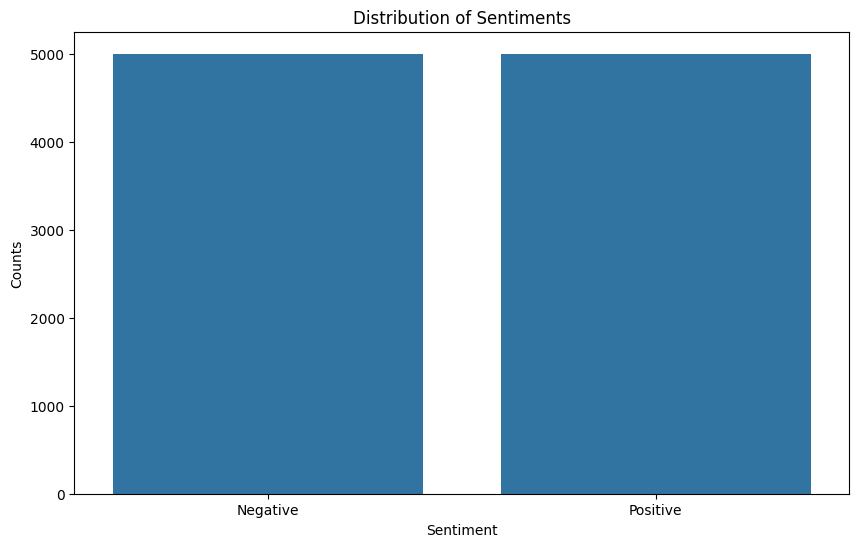

In [5]:
# visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=tweets_df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

Your comment here: The ratio of the Positive and Negative sentiment data points are 1:1. A balanced data distribution can prevent bias towards one sentiment over the other, improving the model's generalization.



# Part 2: Text Preprocessing (25 marks)

### Q2-1: The original tweets might be noisy, containing lots of elements that cause mess. Please think of what preprocessing procedure is needed for this specific dataset, and more important, what is the correct order between these steps. The below functions are the ones I think quite important for the data. Please fill in the function defintion, design more functions (if you want) and apply them in the order you decide. The text after processed should be save in a new column named **tidy_tweet**. Please clearly explain the reason you want to add this function, and why you would like to arrange the order like this. For each function, you need to print out the difference before and after the approach by showing the columns {tweet, tidy_tweet} side by side. (14 marks)

Hint: you may need to find some specific tweets to show the difference. If you want to show that your remove_url function is working properly, you may need to find some original tweets containing urls. You may consider controlling this by the random_state parameter or other methods.

In [ ]:
def convert_to_lowercase(tweet):
    '''
    aim: change all tweets to lower case
    '''
    return tweet

def emoji_to_word(tweet):
    '''
    aim: remove all the emoji in the tweets
    '''
    return tweet

def emoticons_to_word(tweet):
    '''
    aim: based on the emoticon dictionary, replace all the emoticons to corresponding word
    The emoticon dictionary is provided in the next block
    '''
    return tweet

def remove_pattern(tweet, pattern):
    '''
    aim: remove all the "@users" appears in the tweets
    '''
    return tweet

def remove_punctuation(tweet):
    '''
    aim: remove all the punctuation from the tweet given
    Punctuations are characters other than alphaters and digits.
    '''
    return tweet

def remove_stopwords(tweet):
    '''
    aim: remove all stopwords in the tweets
    '''
    return tweet

def remove_urls(tweet):
    '''
    aim: remove all the urls contained inside the tweets
    '''
    return tweet

In [ ]:
Emoticon_Dictionary = {
    u":‑\)":"smiley",
    u":\)":"smiley",
    u":-\]":"smiley",
    u":\]":"smiley",
    u":-3":"smiley",
    u":3":"smiley",
    u":->":"smiley",
    u":>":"smiley",
    u"8-\)":"smiley",
    u":o\)":"smiley",
    u":-\}":"smiley",
    u":\}":"smiley",
    u":-\)":"smiley",
    u":c\)":"smiley",
    u":\^\)":"smiley",
    u"=\]":"smiley",
    u"=\)":"smiley",
    u":‑D":"Laughing",
    u":D":"Laughing",
    u"8‑D":"Laughing",
    u"8D":"Laughing",
    u"X‑D":"Laughing",
    u"XD":"Laughing",
    u"=D":"Laughing",
    u"=3":"Laughing",
    u"B\^D":"Laughing",
    u":-\)\)":"happy",
    u":‑\(":"sad",
    u":-\(":"sad",
    u":\(":"sad",
    u":‑c":"sad",
    u":c":"sad",
    u":‑<":"sad",
    u":<":"sad",
    u":‑\[":"sad",
    u":\[":"sad",
    u":-\|\|":"sad",
    u">:\[":"sad",
    u":\{":"sad",
    u":@":"sad",
    u">:\(":"sad",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"happiness",
    u":'\)":"happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"dismay",
    u"D;":"dismay",
    u"D=":"dismay",
    u"DX":"dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"smirk",
    u";\)":"smirk",
    u"\*-\)":"smirk",
    u"\*\)":"smirk",
    u";‑\]":"smirk",
    u";\]":"smirk",
    u";\^\)":"smirk",
    u":‑,":"smirk",
    u";D":"smirk",
    u":‑P":"playful",
    u":P":"playful",
    u"X‑P":"playful",
    u"XP":"playful",
    u":‑Þ":"playful",
    u":Þ":"playful",
    u":b":"playful",
    u"d:":"playful",
    u"=p":"playful",
    u">:P":"playful",
    u":‑/":"annoyed",
    u":/":"annoyed",
    u":-[.]":"annoyed",
    u">:[(\\\)]":"annoyed",
    u">:/":"annoyed",
    u":[(\\\)]":"annoyed",
    u"=/":"annoyed",
    u"=[(\\\)]":"annoyed",
    u":L":"annoyed",
    u"=L":"annoyed",
    u":S":"annoyed",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed",
    u":‑x":"tongue-tied",
    u":x":"tongue-tied",
    u":‑#":"tongue-tied",
    u":#":"tongue-tied",
    u":‑&":"tongue-tied",
    u":&":"tongue-tied",
    u"O:‑\)":"innocent",
    u"O:\)":"innocent",
    u"0:‑3":"innocent",
    u"0:3":"innocent",
    u"0:‑\)":"innocent",
    u"0:\)":"innocent",
    u":‑b":"cheeky",
    u"0;\^\)":"innocent",
    u">:‑\)":"Evil",
    u">:\)":"Evil",
    u"\}:‑\)":"Evil",
    u"\}:\)":"Evil",
    u"3:‑\)":"Evil",
    u"3:\)":"Evil",
    u">;\)":"Evil",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party",
    u"%‑\)":"confused",
    u"%\)":"confused",
    u":-###..":"sick",
    u":###..":"sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous",
    u"\(\^_\^;\)":"Nervous",
    u"\(-_-;\)":"Nervous",
    u"\(~_~;\) \(・\.・;\)":"Nervous",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"respect",
    u"_\(\._\.\)_":"respect",
    u"<\(_ _\)>":"respect",
    u"<m\(__\)m>":"respect",
    u"m\(__\)m":"respect",
    u"m\(_ _\)m":"respect",
    u"\('_'\)":"Sad",
    u"\(/_;\)":"Sad",
    u"\(T_T\) \(;_;\)":"Sad",
    u"\(;_;":"Sad",
    u"\(;_:\)":"Sad",
    u"\(;O;\)":"Sad",
    u"\(:_;\)":"Sad",
    u"\(ToT\)":"Sad",
    u";_;":"Sad",
    u";-;":"Sad",
    u";n;":"Sad",
    u";;":"Sad",
    u"Q\.Q":"Sad",
    u"T\.T":"Sad",
    u"QQ":"Sad",
    u"Q_Q":"Sad",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Laugh",
    u"<\^!\^>":"Laugh",
    u"\^/\^":"Laugh",
    u"\（\*\^_\^\*）" :"Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Laugh",
    u"\(^\^\)":"Laugh",
    u"\(\^\.\^\)":"Laugh",
    u"\(\^_\^\.\)":"Laugh",
    u"\(\^_\^\)":"Laugh",
    u"\(\^\^\)":"Laugh",
    u"\(\^J\^\)":"Laugh",
    u"\(\*\^\.\^\*\)":"Laugh",
    u"\(\^—\^\）":"Laugh",
    u"\(#\^\.\^#\)":"Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Cheerful",
    u"\(\^_\^\)v":"Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed"
}

In [ ]:
# following the order you specify above, print out columns {tweet, tidy_tweet} side by side


### Q2-2: After obtaining the clean text, we would perform stemming or lemmatization on the tweets. Fill in the defintion below and compare the difference between these two methods by creating and printing two columns {stem_tweet, lemm_tweet} side by side. State the reason why you prefer one over another. Choose the one you prefer to apply the procedure on the column {tidy_tweet}. (6 marks)

In [ ]:
def stemming(tweet):
    '''
    aim: perform stemming on the text
    '''

def lemmatization(tweet):
    '''
    aim: perform lemmatization on the text
    '''

### Q2-3: Tokenize the tweets and print out the final dataframe (5 marks)

In [ ]:
def tokenization(tweet):
    '''
    aim: perform tokenization on the text
    '''

your_final_dataframe.sample(10)

# Part 3: Visualization (15 marks)

### Q3-1: Build and plot the wordcloud for the whole dataset, the negative tweets, and the positive tweets, respectively. Analyze if the result is reasonable. Or if you think there are strange scenarios, what is the possible reasons behind. (5 marks)

In [ ]:
# wordcloud for all

# wordcloud for negative

# wordcloud for positive


### Q3-2: Hashtag might contains important information regarding the sentiment. Build two barplots for the hashtag in negative tweets and positive tweets respectively. What do you find? Do you think hashtag is helpful for our sentimental analysis? (10 marks)

In [ ]:
# bar plot for negative

# bar plot for positive


# Part 4: Modelling (50 marks)

### Q4-1: Divide the dataset into 80% training set and 20% testing set. Perform three types of feature extraction techniques we have covered so far to the dataset for preparation. Clearly state what is the difference between these techniques and which one you expect would be the most appropriate. (5 marks)

In [ ]:
# divide the datatset

# feature extraction 1

# feature extraction 2

# feature extraction 3


### Q4-2: Use the sklearn package to implement KNN classifier models with difference number of neighbors. Please use three types of features above, and use the following metrics for comparing the performance: {accuracy, f1, precision, recall}. Write out how the metrics are calculated with formulas (or other ways). Plot the results using line chart, and suggest the best choice for this parameter. (10 marks)

In [ ]:
# KNN classifiers with different neighbors (1,2,3,4,... etc)

# plot a line chart


### Q4-3: Use the sklearn package to implement Naive Bayes classifier, Logistic regression, and KNN classifier. For KNN, you may directly use the best result above. Again use three types of features above, and use the following metrics for comparing the performance: {accuracy, f1, precision, recall}. Summarize the scores into tables and provide possible reasons that lead to this situation. Is the performance good? Why? (5 marks)

Hint: you should have $3*3*4=36$ outputs. When performing comparison, you could analyze from two views, one is comparing different feature extraction methods while model is the same, another is comparing different models when applying the same feature extraction procedure.

In [ ]:
# naive bayes classifier

# logistic regression


### Q4-4: Write out the procedure how naive bayes classifier is classifying our dataset. Remember to clearly write out the mathematical formulas involved in the procedure. Implement the naive bayes classifier step by step (without directly calling any package). Add clear explanations to your python code based on the procedure you stated above. Compare the results you get here with the one in Q4-3. (15 marks)

Naive Bayes procedure:

In [ ]:
# implement naive bayes based on the above procedure


### Q4-5: Write out the procedure how logistic regression is working in our case. Remember to clearly write out the mathematical formulas involved in the procedure. Implement the logistic regression using Stochastic Gradient Descent (SGD) step by step (without directly calling any package). Add clear explanations to your python code based on the procedure you stated above. Compare the results you get here with the one in Q4-3.

Logistic regression procedure:


In [ ]:
# implement logistic regression based on the above procedure
